In [179]:
import datetime as dt
print(dt.datetime.now())

2020-05-15 20:27:32.479931


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [181]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                  "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                  "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                  "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                  "ies/time_series_covid19_recovered_global.csv")

In [182]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,820,832,842,850,856,868,872,876,880,898
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,751,751,752,752,754,755,755,758,760,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,36,36,36,43,43,45,45,45,45,48


In [183]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,421,458,468,472,502,558,558,610,648,691
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,570,595,605,620,627,650,654,682,688,694
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,514,521,526,537,545,550,550,568,576,596
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,11,13,13,13,13,14,14


In [184]:
start_date = '1/22/20'
# Needed because of daily updates on database which cannot be updated yet
# where the date of "today" has not been updated.
# So, for practicity, we get one day before. We could get the last column as well.
end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')

In [185]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [186]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Iran,0,0,0,0,0,0,0,0,0,0,...,99970,101650,103135,104691,106220,107603,109286,110767,112725,114533
Turkey,0,0,0,0,0,0,0,0,0,0,...,129491,131744,133721,135569,137115,138657,139771,141475,143114,144749
Germany,0,0,0,0,0,1,4,4,4,5,...,167007,168162,169430,170588,171324,171879,172576,173171,174098,174478
France,0,0,2,3,3,3,4,5,5,5,...,170687,174224,174918,176202,176782,177094,177547,178349,178184,178994
Brazil,0,0,0,0,0,0,0,0,0,0,...,115455,126611,135773,146894,156061,162699,169594,178214,190137,203165
Italy,0,0,0,0,0,0,0,0,0,2,...,213013,214457,215858,217185,218268,219070,219814,221216,222104,223096
Spain,0,0,0,0,0,0,0,0,0,0,...,219329,220325,221447,222857,223578,224350,227436,228030,228691,229540
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,196243,202359,207977,212629,216525,220449,224332,227741,230985,234440
Russia,0,0,0,0,0,0,0,0,0,2,...,155370,165929,177160,187859,198676,209688,221344,232243,242271,252245


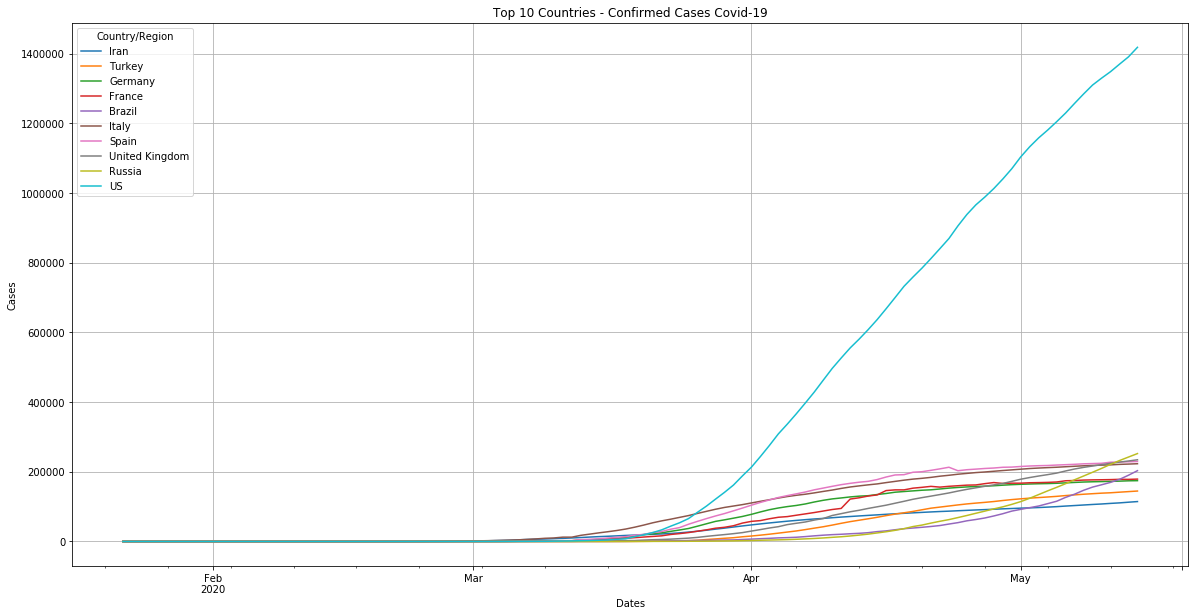

In [187]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,1,1)
df_top10 = df_top10.T
df_top10.index = pd.to_datetime(df_top10.index)
df_top10.plot(ax=ax, legend=True)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize=12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases");

Extracting data from recovered cases of Top 10 Countries with confirmed cases.

In [188]:
top10_countries = df_top10.columns.tolist() # Name of contries inside top 10
# Searchinbg recovered cases with the top10 countries name.
df_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(top10_countries)]
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.loc[:, start_date:end_date]
df_recovered = df_recovered.sort_values(by=[end_date]).tail(10)

In [189]:
df_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,926,934,970,997,1001,1002,1015,1023,1032,1043
Russia,0,0,0,0,0,0,0,0,0,0,...,19865,21327,23803,26608,31916,34306,39801,43512,48003,53530
France,0,0,0,0,0,0,0,0,0,0,...,52842,54079,55191,55892,56148,56327,56835,57898,58786,59719
Brazil,0,0,0,0,0,0,0,0,0,0,...,48221,51370,55350,59297,61685,64957,67384,72597,78424,79479
Iran,0,0,0,0,0,0,0,0,0,0,...,80475,81587,82744,83837,85064,86143,87422,88357,89428,90539
Turkey,0,0,0,0,0,0,0,0,0,0,...,73285,78202,82984,86396,89480,92691,95780,98889,101715,104030
Italy,0,0,0,0,0,0,0,0,0,0,...,85231,93245,96276,99023,103031,105186,106587,109039,112541,115288
Spain,0,0,0,0,0,0,0,0,0,0,...,123486,126002,128511,131148,133952,136166,137139,138980,140823,143374
Germany,0,0,0,0,0,0,0,0,0,0,...,135100,139900,141700,141700,143300,144400,145617,147200,148700,150300


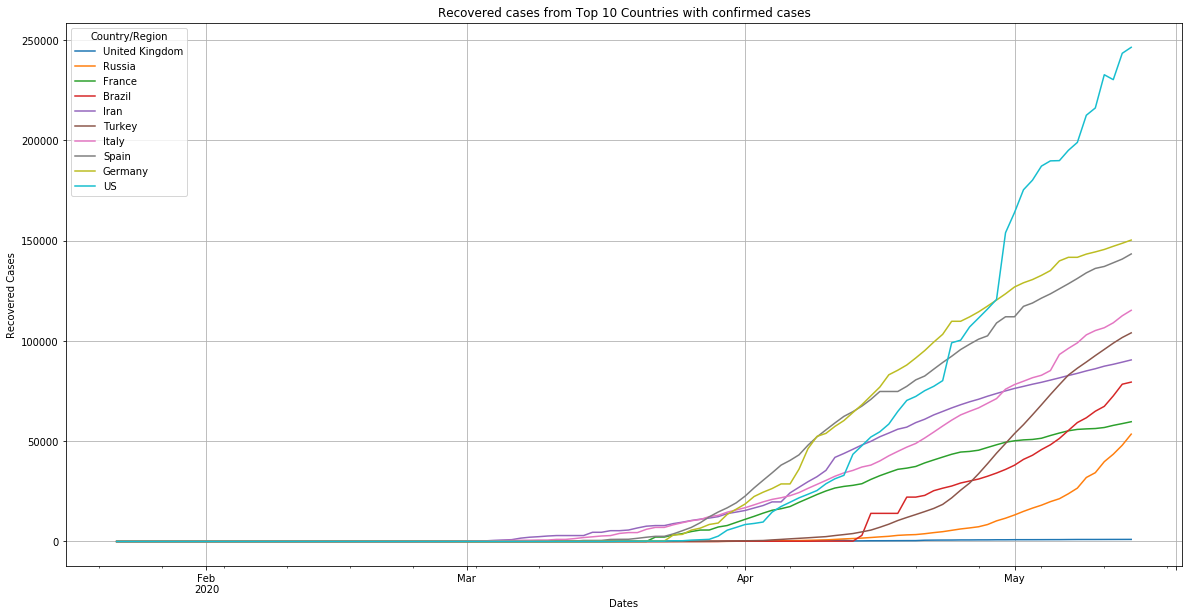

In [192]:
fig = plt.figure(figsize = (20, 10))
ax_2 = fig.add_subplot(1,1,1)
df_recovered = df_recovered.T
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.plot(ax=ax_2, legend=True)
ax_2.set_title("Recovered cases from Top 10 Countries with confirmed cases", fontsize=12)
ax_2.grid(True)
ax_2.set(xlabel='Dates', ylabel='Recovered Cases');